<img src="3.jpg" style="width:900px;height:250px;">

### Objetivos:

1- Visualizar Tonos en GNU Radio.

2- Identificar Conceptos Generales de un Sistema de TX y RX.

<div class="alert alert-block alert-warning">
    <b> Primera Parte:</b> GNU Radio
</div>

### 1. Generación y Visualización del Primer Tono

<img src="D_Tono1.jpg">

<img src="G_Tono1.jpg">

<img src="G1_Tono1.jpg">

### 2. Generación y Visualización del Segundo Tono

<img src="D_Tono2.jpg">

<img src="G_Tono2.jpg">

<img src="G1_Tono2.jpg">

### 3. Generación y Visualización del Tercer Tono

<img src="D_Tono3.jpg">

<img src="G_Tono3.jpg">

<img src="G1_Tono3.jpg">

### 4. Visualización de la Sumatoria de los 3 Tonos

<img src="D_SumaTonos_Visual.jpg">

<img src="G_SumaTonoVisual.jpg">

<img src="G1_SumaTonoVisual.jpg">

### 5. Visualización de la Sumatoria de los 3 Tonos y el Filtro de la Señal Senoidal de 0.9 Khz

<img src="D_SumaTonos_Filtro.jpg">

<img src="G_SumaTonoFiltro.jpg">

<img src="G1_SumaTonoFiltro.jpg">

<div class="alert alert-block alert-warning">
    <b> Segunda Parte:</b> Python
</div>

## 2. Importación de Librerias 

In [1]:
import pandas as pd
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Parámetros de los Tonos

In [2]:
Fs=32000 # Definimos la Frecuencia de Muestreo [Hz]
T=1     # Definimos la Duración de las Señales [Seg]
Ts=1/Fs  # Calculamos el Tiempo de Muestreo [Seg]
n=np.arange(Fs* T) # Definimos el Bin de Muestreo.
Volumen = 0.5     # Rango [0.0, 1.0]
len(n)

## 4. Creación del Primer Tono

In [3]:
# Primer Tono
f1=100   # Definimos la Frecuencia del Tono [Hz]
A1=5     # Amplitud del Primer Tono
Signal_Sources1=A1*np.sin(2*np.pi*f1*n*Ts).astype(np.float32) 
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=Fs, frames_per_buffer=1024, output=True)
stream.write(Signal_Sources1.astype(np.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

### 4.1 Visualización del Primer Tono

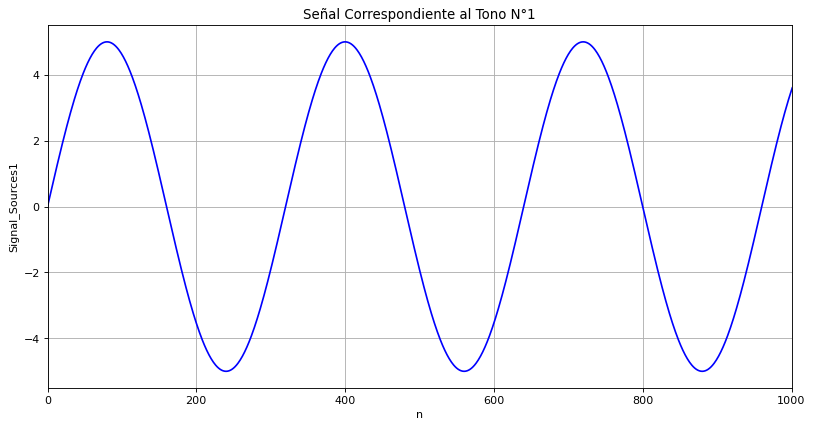

In [4]:
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n,Signal_Sources1,'b')
plt.title('Señal Correspondiente al Tono N°1')
plt.xlabel('n')
plt.ylabel('Signal_Sources1')
plt.xlim([0,1000])
plt.grid()

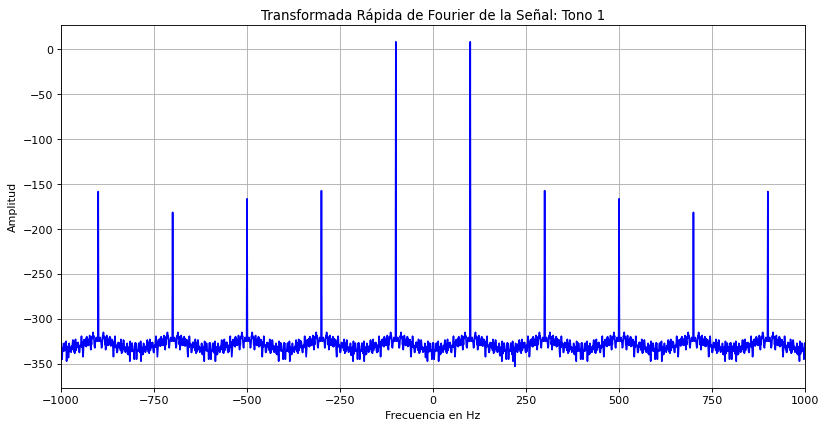

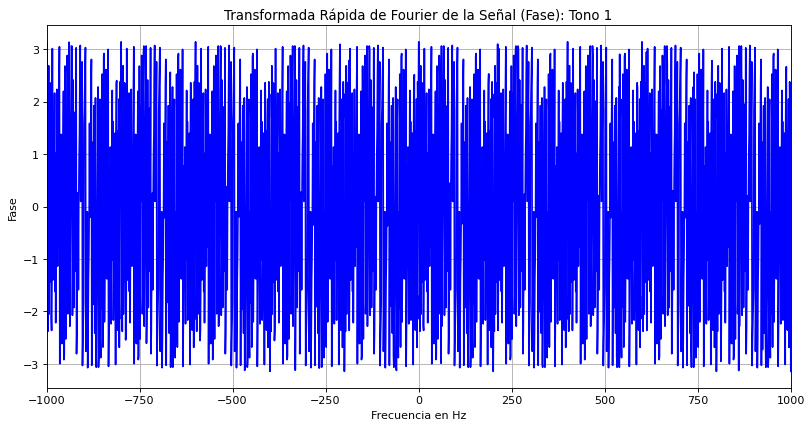

In [5]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x    
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x))
    return (f,X,angle)

f,X,angle = trans_fourier_f(Signal_Sources1,Fs,window=True,l=0)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,20*np.log10(X/len(X)),'b')
plt.title('Transformada Rápida de Fourier de la Señal: Tono 1')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Amplitud')
plt.xlim([-1000,1000])
plt.grid()

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,angle,'b')
plt.title('Transformada Rápida de Fourier de la Señal (Fase): Tono 1')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Fase')
plt.xlim([-1000,1000])
plt.grid()

## 5. Creación del Segundo Tono

In [6]:
# Segundo Tono
f2=500  # Definimos la Frecuencia del Tono [Hz]
A2=5  # Amplitud del Segundo Tono
Signal_Sources2=A2*np.sin(2*np.pi*f2*n*Ts).astype(np.float32)
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=Fs, frames_per_buffer=1024, output=True) 
stream.write(Signal_Sources2.astype(np.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

### 5.1 Visualización del Segundo Tono

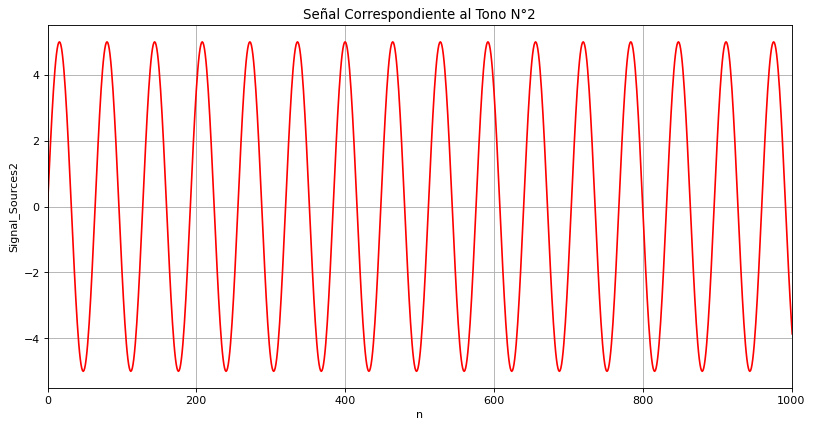

In [7]:
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n,Signal_Sources2,'r')
plt.title('Señal Correspondiente al Tono N°2')
plt.xlabel('n')
plt.ylabel('Signal_Sources2')
plt.xlim([0,1000])
plt.grid()

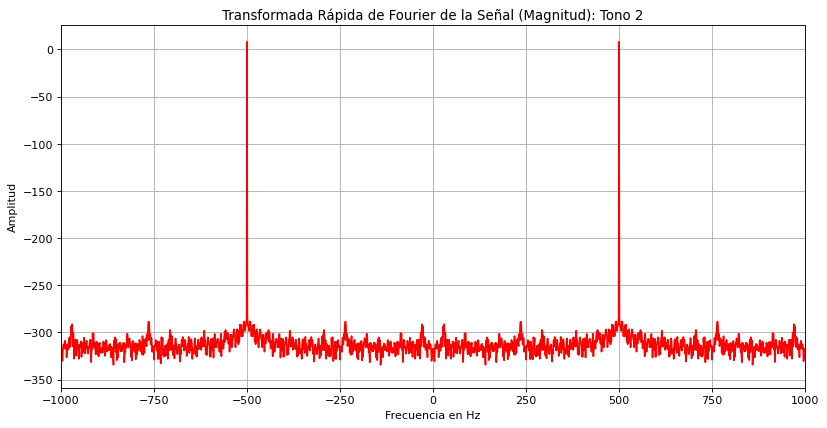

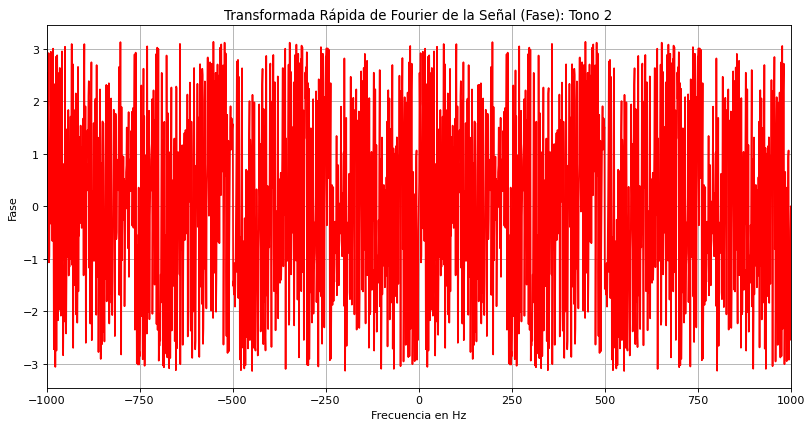

In [8]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x    
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x))
    return (f,X,angle)

f,X,angle = trans_fourier_f(Signal_Sources2,Fs,window=True,l=0)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,20*np.log10(X/len(X)),'r')
plt.title('Transformada Rápida de Fourier de la Señal (Magnitud): Tono 2')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Amplitud')
plt.xlim([-1000,1000])
plt.grid()

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,angle,'r')
plt.title('Transformada Rápida de Fourier de la Señal (Fase): Tono 2')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Fase')
plt.xlim([-1000,1000])
plt.grid()

## 6. Creación del Tercer Tono

In [10]:
# Tercer Tono
f3=900   # Definimos la Frecuencia del Tono [Hz]
A3=5     # Amplitud del Tercer Tono
Signal_Sources3=A3*np.sin(2*np.pi*f3*n*Ts).astype(np.float32)
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=Fs, frames_per_buffer=1024, output=True)
stream.write(Signal_Sources3.astype(np.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

### 6.1 Visualización del Tercer Tono

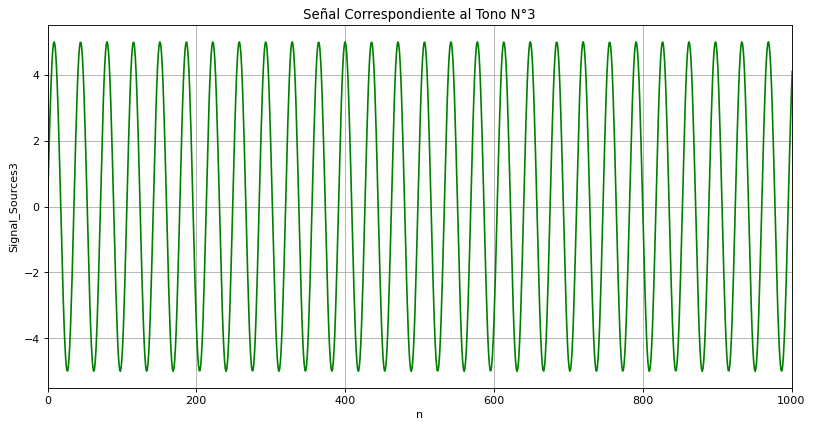

In [11]:
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n,Signal_Sources3,'g')
plt.title('Señal Correspondiente al Tono N°3')
plt.xlabel('n')
plt.ylabel('Signal_Sources3')
plt.xlim([0,1000])
plt.grid()

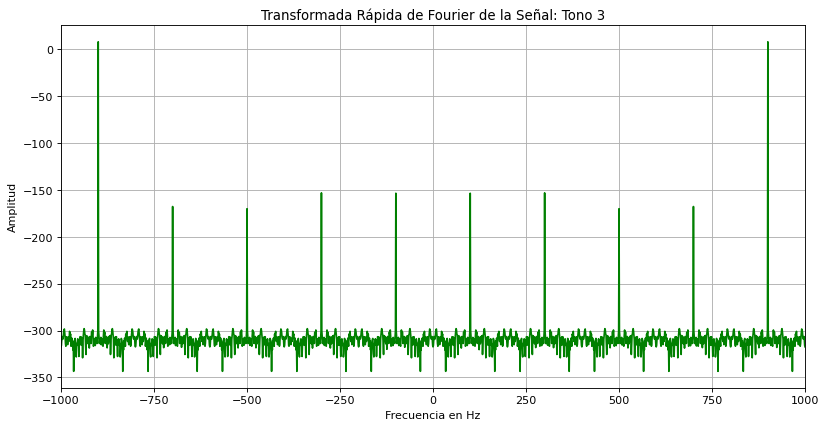

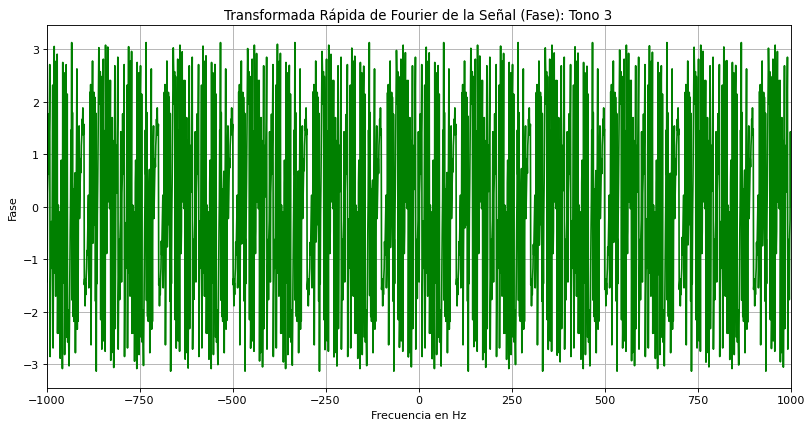

In [12]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x    
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x))
    return (f,X,angle)

f,X,angle = trans_fourier_f(Signal_Sources3,Fs,window=True,l=0)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,20*np.log10(X/len(X)),'g')
plt.title('Transformada Rápida de Fourier de la Señal: Tono 3')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Amplitud')
plt.xlim([-1000,1000])
plt.grid()

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,angle,'g')
plt.title('Transformada Rápida de Fourier de la Señal (Fase): Tono 3')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Fase')
plt.xlim([-1000,1000])
plt.grid()

## 7. Suma de las 3 Señales

In [13]:
Signal_Sources_Total= Signal_Sources1+Signal_Sources2+Signal_Sources3
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=Fs, frames_per_buffer=1024, output=True)
stream.write(Signal_Sources_Total.astype(np.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

### 7.1 Visualización de las 3 Señales

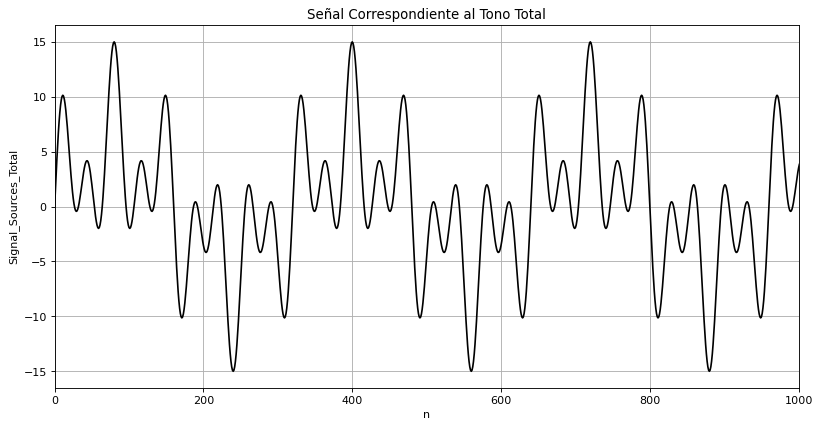

In [14]:
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(n,Signal_Sources_Total,'k')
plt.title('Señal Correspondiente al Tono Total')
plt.xlabel('n')
plt.ylabel('Signal_Sources_Total')
plt.xlim([0,1000])
plt.grid()

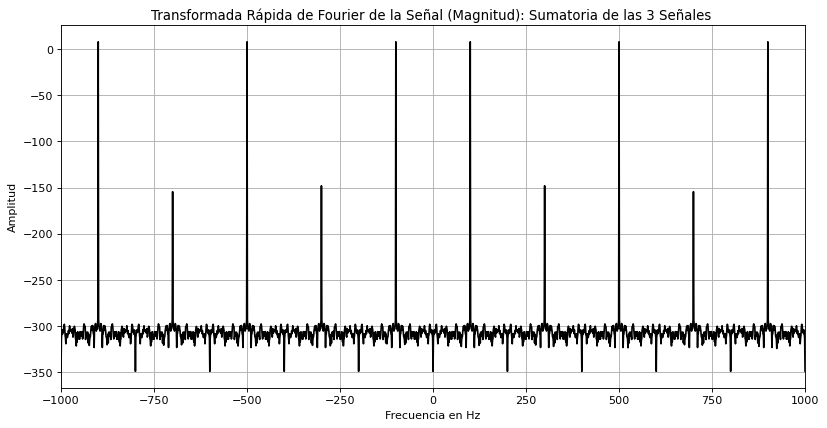

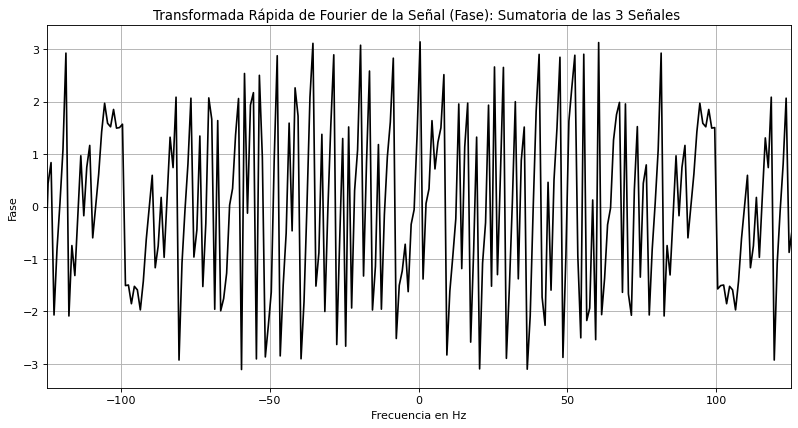

In [21]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x    
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x))
    return (f,X,angle)

f,X,angle = trans_fourier_f(Signal_Sources_Total,Fs,window=True,l=0)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,20*np.log10(X/len(X)),'k')
plt.title('Transformada Rápida de Fourier de la Señal (Magnitud): Sumatoria de las 3 Señales ')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Amplitud')
plt.xlim([-1000,1000])
plt.grid()

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,angle,'k')
plt.title('Transformada Rápida de Fourier de la Señal (Fase): Sumatoria de las 3 Señales ')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Fase')
plt.xlim([-125, 125])
#plt.xlim([-1000,1000])
plt.grid()

## Filtrado de la Señal de 0.9 Khz en la Sumatoria de los 3 Tonos.

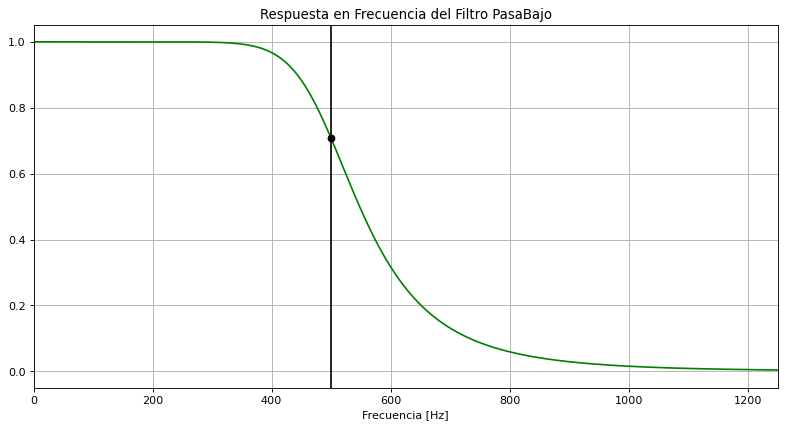

In [16]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y



# Definimos los Requerimientos del Filtro
order = 6
fs = Fs     # Definimos la Tasa de Muestreo
cutoff = 500  # Designamos la Frecuencia de Corte del Filtro

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Graficamos la Respuesta en Frecuencia
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'g')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Respuesta en Frecuencia del Filtro PasaBajo")
plt.xlabel('Frecuencia [Hz]')
plt.xlim([0,1250])
plt.grid()

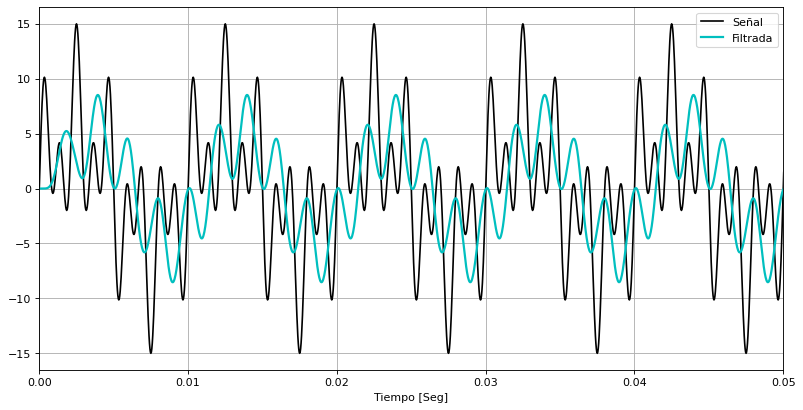

In [17]:
# Aplicamos a la Sumatoria el Filtro Diseñado Anteriormente.
T = T             # Segundos
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)

y = butter_lowpass_filter(Signal_Sources_Total, cutoff, fs, order)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(t, Signal_Sources_Total, 'k-', label='Señal')
plt.plot(t, y, 'c-', linewidth=2, label='Filtrada')
plt.xlabel('Tiempo [Seg]')
plt.grid()
plt.xlim([0,0.05])
plt.legend()
plt.show()

In [18]:
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=Fs, frames_per_buffer=1024, output=True)
stream.write(y.astype(np.float32).tostring())
stream.stop_stream()
stream.close()
p.terminate()

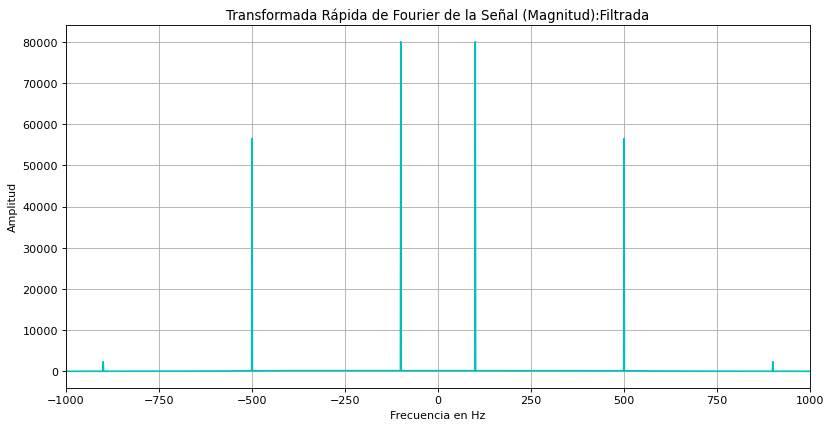

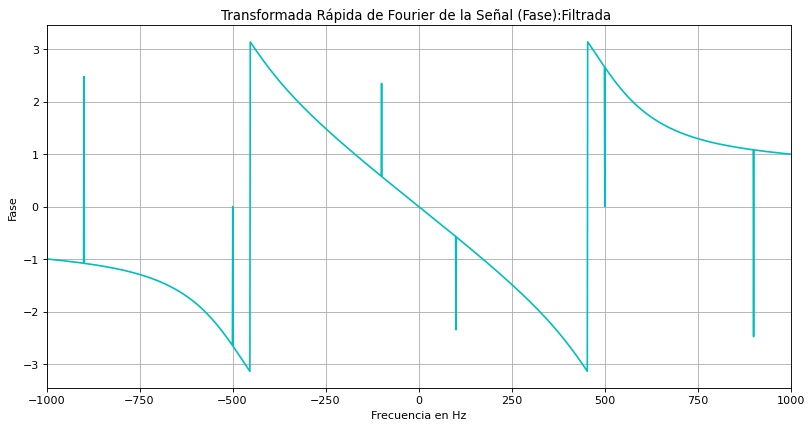

In [19]:
def trans_fourier_f (x,sample_rate,window=None,l=0):
    if l > len(x):
        x = np.pad(x,(0,l))
    if window:
        window = np.hamming(len(x))
        XX = window*x    
    XX = np.fft.fft(x)
    XX = np.fft.fftshift(XX)
    X = abs(XX)
    angle = np.angle(XX)
    Df = sample_rate/len(x)
    f = np.linspace((-len(x)/2)*Df,(len(x)/2)*Df,len(x))
    return (f,X,angle)

f,X,angle = trans_fourier_f(y,Fs,window=True,l=0)
plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
#plt.plot(f,20*np.log10(X/len(X)),'c')
plt.plot(f,X,'c')
plt.title('Transformada Rápida de Fourier de la Señal (Magnitud):Filtrada')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Amplitud')
plt.xlim([-1000,1000])
plt.grid()

plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(f,angle,'c')
plt.title('Transformada Rápida de Fourier de la Señal (Fase):Filtrada ')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Fase')
plt.xlim([-1000,1000])
plt.grid()

<div class="alert alert-block alert-warning">
    <b> Tercera Parte:</b> SDR PLUTO + GNURadio
</div>

<img src="DiagramaParteC.jpg">

<div class="alert alert-block alert-warning">
    <b> Cuarta Parte:</b> SDR PLUTO + Python
</div>

In [ ]:
import time

import adi #Proveniente de la LibioO
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Creamos la Radio mediante la Instancia Adi Wrapper
sdr = adi.Pluto() #Importamos el Paquete Adi

# Configuramos el Pluto
sdr.rx_rf_bandwidth = 4000000 # Ancho de Banda
sdr.rx_lo = 1000000000 # Frecuencia del Oscilador Local RX 
sdr.tx_lo = 1000000000 #Frecuencia del Oscilador Local TX (Portadora)
sdr.tx_cyclic_buffer = True  #Buffer configurado en Transmisión Contínua.
sdr.tx_hardwaregain_chan0 = -30 #Ganancia 
sdr.gain_control_mode_chan0 = "slow_attack"

In [ ]:
sdr.sample_rate=522000 # Tasa de Muestreo Mínima a configurar.
# Create a sinewave waveform
fs = int(sdr.sample_rate)
print('fs =',fs)
fc1 =100
fc2 =500
fc3 =900
N = 1024 #Se deja asi porque nos sabemos que tamaño del Buffer
ts = 1 / float(fs)
t = np.arange(0, N * ts, ts)
i = (np.cos(2 * np.pi * t * fc1)+np.cos(2 * np.pi * t * fc2)+np.cos(2 * np.pi * t * fc3) ) * 2 ** 14
q = 0
iq = i + 1j * q

In [ ]:
#Graficamos la señal a Transmitir
plt.plot(i[:],'.')

In [ ]:
# Enviamos la Sumatoria de los Tonos de Audio
sdr.tx(iq)# Envio de la Suma de los3 Tonos

In [ ]:
# Recibimos la Sumatoria de los 3 Tonos
x = ();
xacc=np.array([])
for r in range(100):
    x = sdr.rx()
    xacc=np.append(xacc,x)
print(x)

In [ ]:
# Escuchamos el Audio
Fs_audio=32000
import pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=Fs_audio,
                frames_per_buffer=1024,
                output=True,
                #output_device_index=1
                )
#Escuchamos la suma de los 3 tonos.
stream.write(np.real(xacc).astype(np.float32).tostring())
stream.close()